EMAIL SPAM DETECTION USING MACHINE LEARNING

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import string

In [2]:
DF=pd.read_csv('spam.csv',encoding='latin-1')
DF.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
DF=DF.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
DF.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
DF.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
DF.shape

(5572, 2)

In [6]:

for i in range(0,5572):
    if DF['v1'][i]=="spam":
        DF['v1'][i]=1
    else:
        DF['v1'][i]=0
DF['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: object

In [7]:
DF.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [8]:
DF.rename(columns={'v1':'target','v2':'text'},inplace=True)
DF.sample(10)

,target,text
2145,1,Sunshine Hols. To claim ur med holiday send a ...
4434,1,Don't b floppy... b snappy & happy! Only gay c...
4521,0,DO U WANT 2 MEET UP 2MORRO
911,0,I am sorry it hurt you.
923,0,She went to attend another two rounds today..b...
3546,1,Rock yr chik. Get 100's of filthy films &XXX p...
3084,0,In da car park
4602,0,And I don't plan on staying the night but I pr...
2458,0,"Cool, I'll text you when I'm on the way"
270,0,"Come to mu, we're sorting out our narcotics si..."


In [9]:
DF.duplicated().sum()

403

In [10]:
DF=DF.drop_duplicates(keep='first')
DF.duplicated().sum()

0

In [11]:
DF.shape

(5169, 2)

Data Analysis

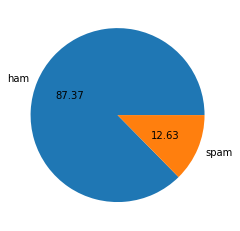

In [12]:
plt.pie(DF['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prathmesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
DF['num_char']=DF['text'].apply(len)
DF.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
DF['num_word']=DF['text'].apply(lambda x:len(nltk.word_tokenize(x)))
DF.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
DF['num_sent']=DF['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
DF.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
DF.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='num_sent', ylabel='Count'>

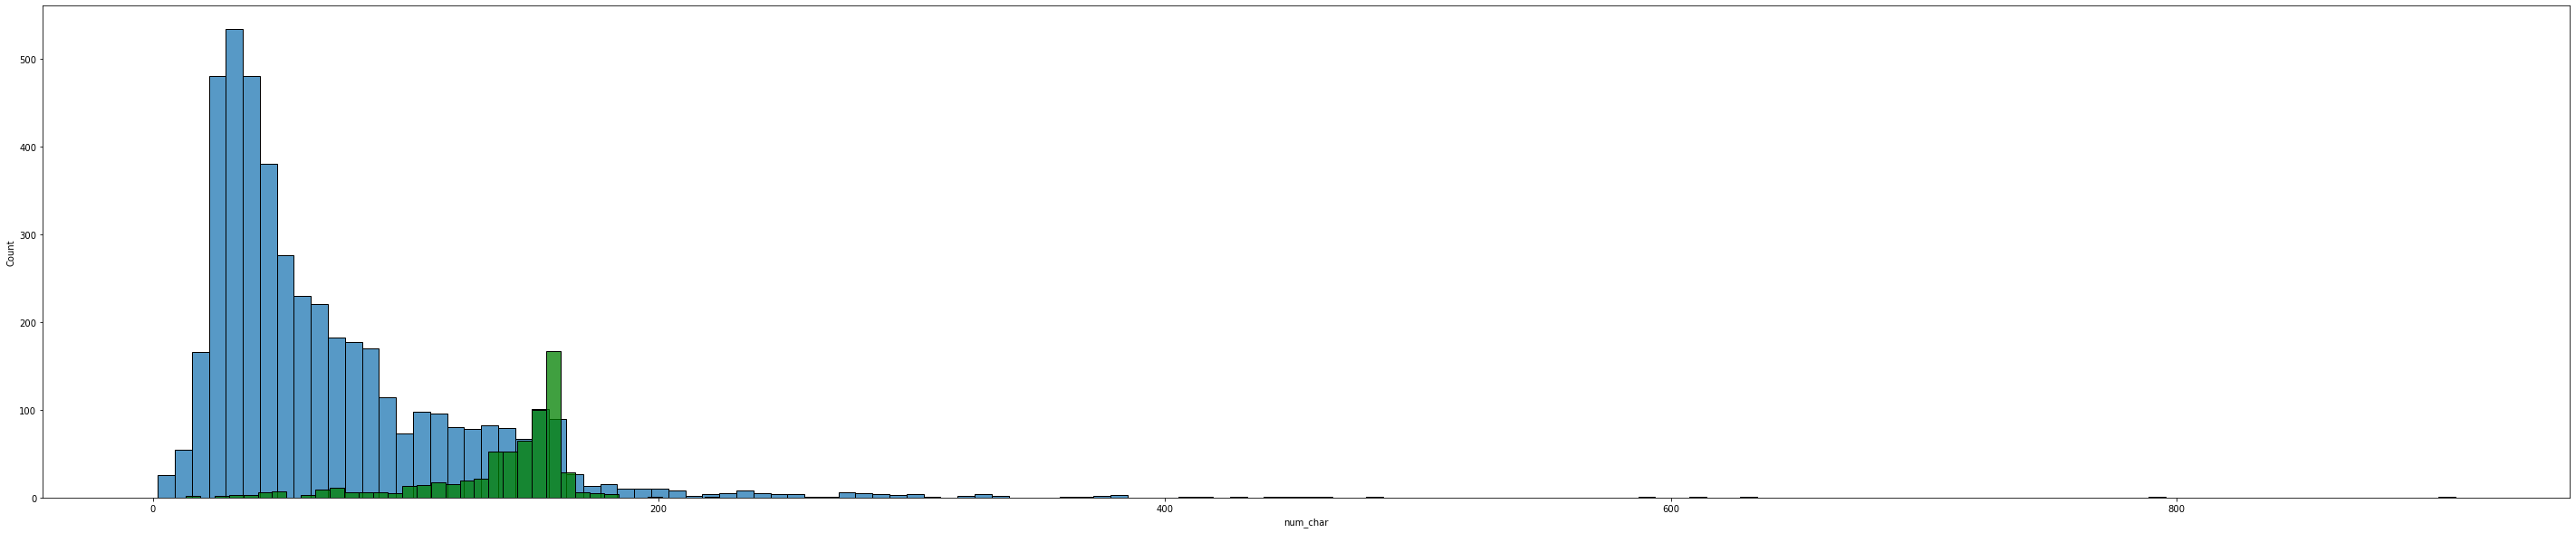

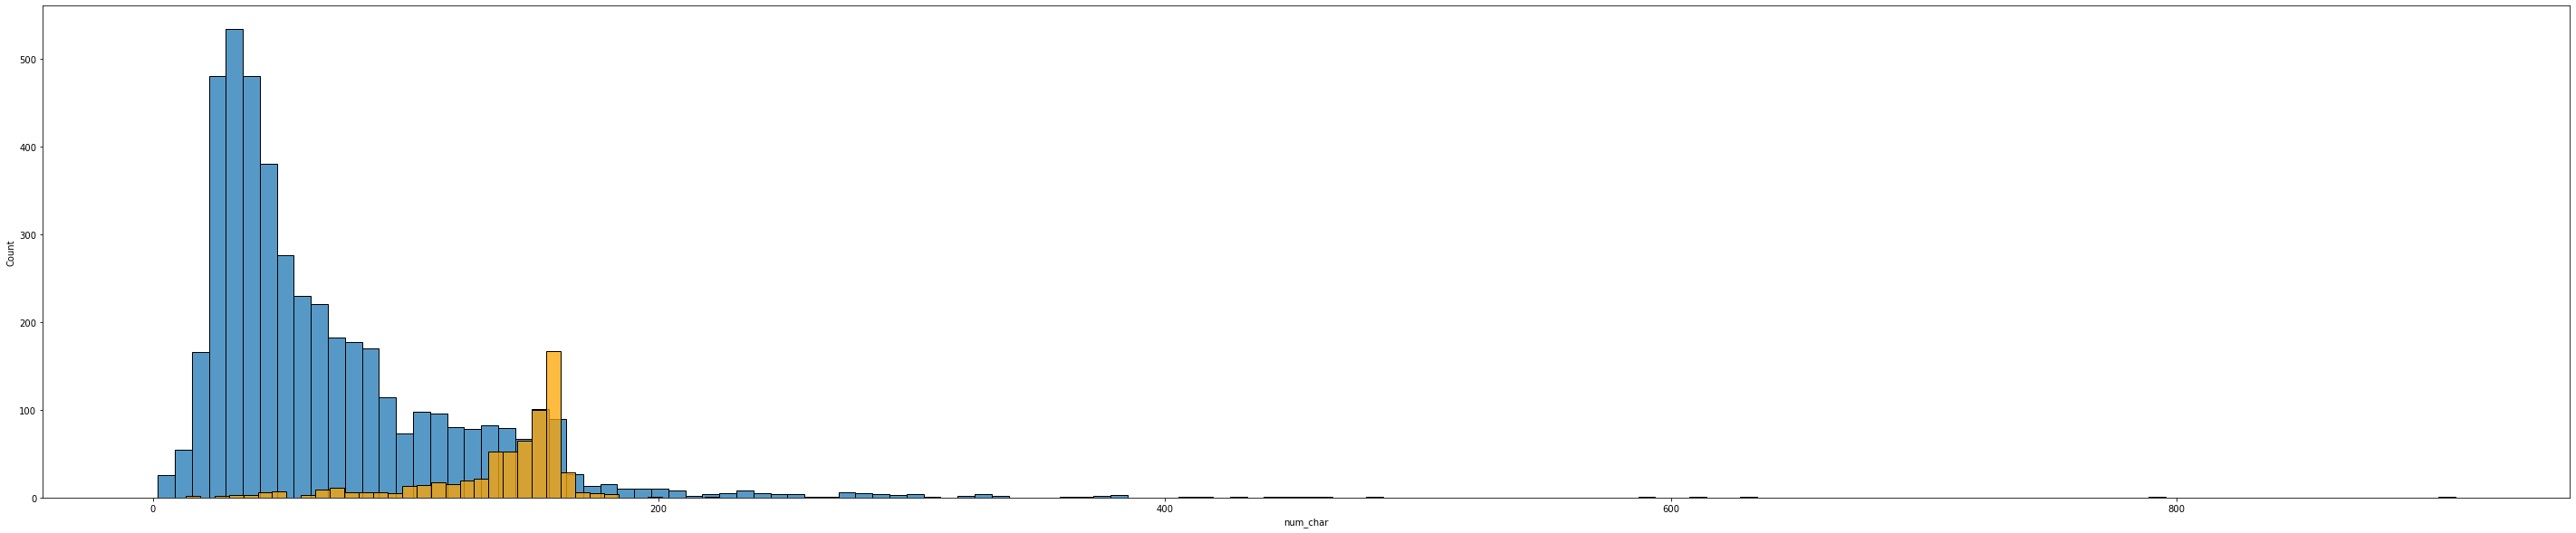

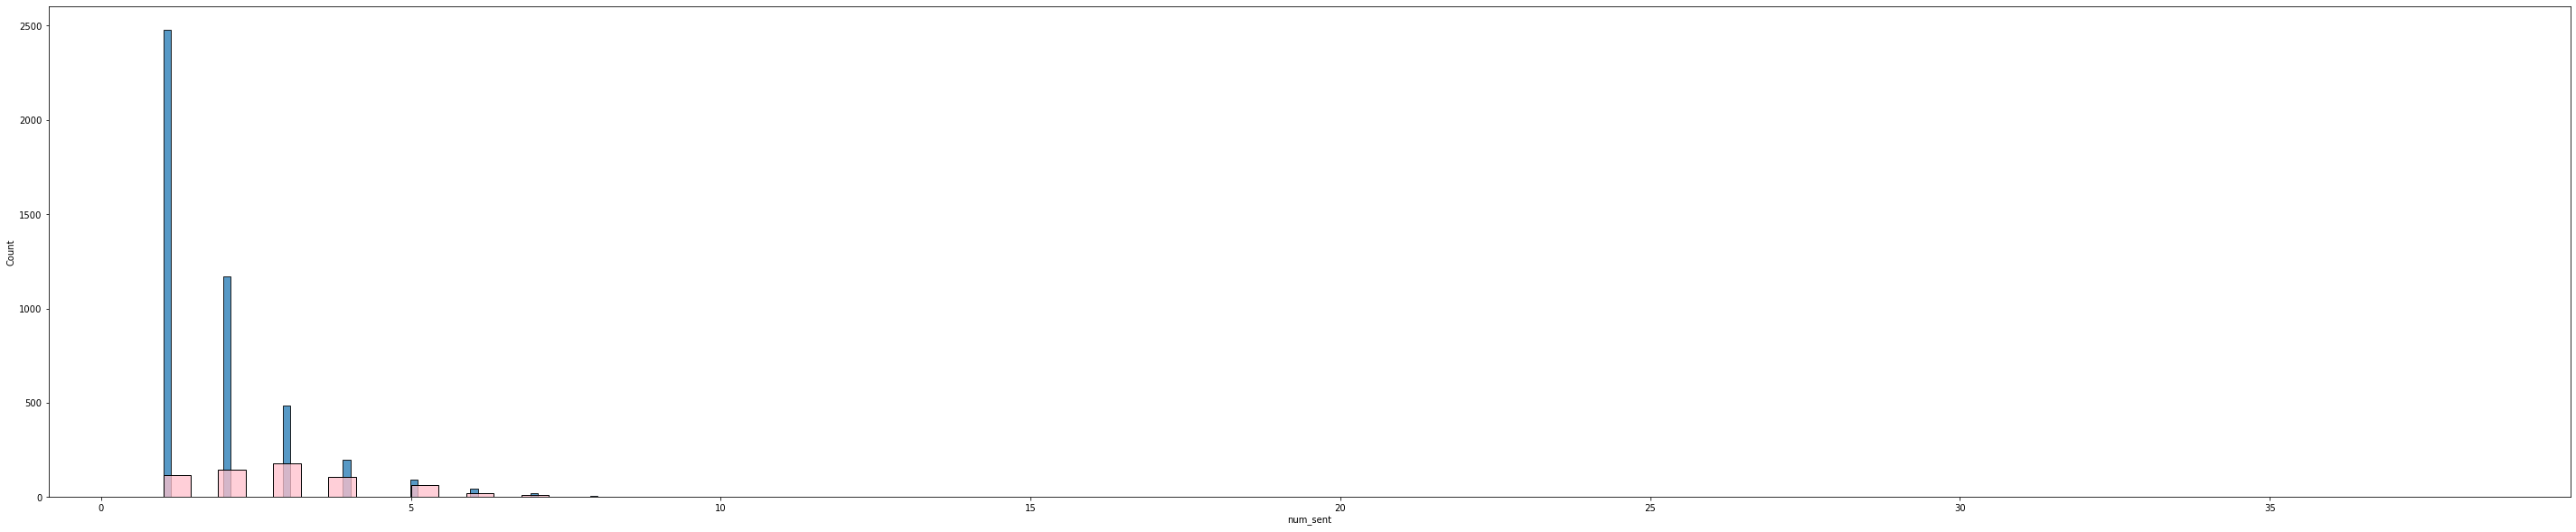

In [18]:
plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_char'])
sns.histplot(DF[DF['target']==1]['num_char'],color='green')

plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_char'])
sns.histplot(DF[DF['target']==1]['num_char'],color='orange')

plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_sent'])
sns.histplot(DF[DF['target']==1]['num_sent'],color='pink')

<Figure size 2160x720 with 0 Axes>

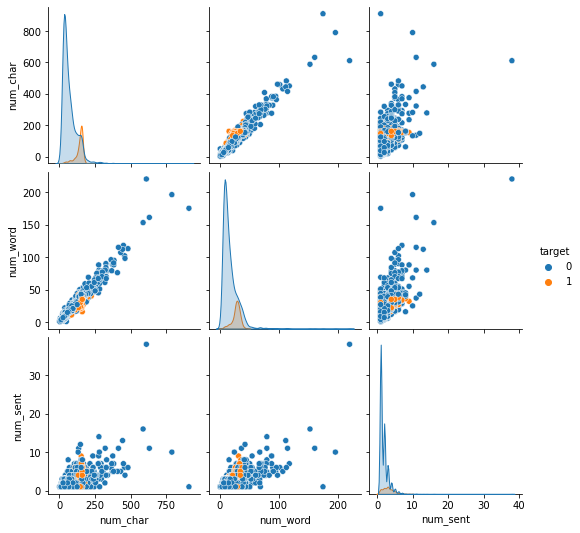

In [19]:
plt.figure(figsize=(30,10))
sns.pairplot(DF,hue='target')

<AxesSubplot:>

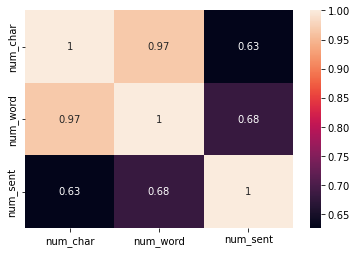

In [20]:
sns.heatmap(DF.corr(),annot=True)

In [21]:
DF.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
DF.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Processing of Data

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('sleeping')

'sleep'

In [24]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
      y.append(ps.stem(i))
            
    return " ".join(y)

In [25]:
DF.head(10)

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
